### <center>MLZC Capstone Project 1 - Q4/2022<img align="right" src="media/insulina_124.jpg">

# <center> Diabetes Health Indicators Dataset  
# <center> Part 1/2

# cp1-10 EDA and Training

### Import (check versions)

In [1]:
!python --version

Python 3.9.11


In [2]:
import sys
sys.version

'3.9.11 (tags/v3.9.11:2de452f, Mar 16 2022, 14:33:45) [MSC v.1929 64 bit (AMD64)]'

In [3]:
import pandas as pda
pda.__version__

'1.5.2'

In [4]:
import numpy as npy
npy.__version__

'1.23.5'

In [5]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

sklearn.__version__

'1.2.0'

In [6]:
from sklearn.metrics import mutual_info_score
from sklearn.metrics import roc_auc_score

In [7]:
import xgboost as xgb
xgb.__version__

'1.7.2'

In [8]:
from pydantic import BaseModel

In [9]:
import bentoml
bentoml.__version__

'1.0.12'

<div class="alert alert-block alert-danger">
    <p> This verison of bentoml does <b>NOT</b> work (in Windows 10) for <b>containerize</b> (works ok for the rest)
    <p> Had to create a dedicated pipenv with bentoml==1.0.7 just for the containerize command (see part2)
</div>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.__version__ 

'0.12.1'

In [149]:
import requests

In [12]:
from tqdm.notebook import tqdm 

## Pipfile
### Clone this Pipfile to create your pipenv environment

In [161]:
!type Pipfile

[[source]]
url = "https://pypi.org/simple"
verify_ssl = true
name = "pypi"

[packages]
notebook = "*"
numpy = "*"
pandas = "*"
sklearn = "*"
xgboost = "*"
matplotlib = "*"
seaborn = "*"
scikit-learn = "*"
pydantic = "*"
tqdm = "*"
ipywidgets = "*"
bentoml = "*"

[dev-packages]

[requires]
python_version = "3.9"


## Diabetes Health Indicators Dataset 
From Kaggle: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
### 1. Download archive.zip in data folder
### 2. Unzip here

In [14]:
!dir .\data 

 Volume in drive C has no label.
 Volume Serial Number is E8A5-BC16

 Directory of C:\Users\alain\Documents\prv\IT\mlzc-cp1\data

13/12/2022  16:34    <DIR>          .
13/12/2022  16:34    <DIR>          ..
13/12/2022  16:34         6,324,278 archive.zip
08/11/2021  16:49        22,738,151 diabetes_012_health_indicators_BRFSS2015.csv
08/11/2021  16:49         6,347,570 diabetes_binary_5050split_health_indicators_BRFSS2015.csv
08/11/2021  16:49        22,738,154 diabetes_binary_health_indicators_BRFSS2015.csv
               4 File(s)     58,148,153 bytes
               2 Dir(s)  79,672,610,816 bytes free


In [166]:
# Url of csv file 
urlCsv = '.\data\diabetes_binary_health_indicators_BRFSS2015.csv'               # 253680 rows × 22 columns

In [16]:
# load dataframe from csv
dfrDia = pda.read_csv(urlCsv)

In [17]:
dfrDia.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Diabetes_binary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
HighBP,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
HighChol,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
CholCheck,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BMI,40.0,25.0,28.0,27.0,24.0,25.0,30.0,25.0,30.0,24.0,25.0,34.0,26.0,28.0,33.0
Smoker,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
Stroke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
PhysActivity,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Fruits,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [18]:
dfrDia.shape

(253680, 22)

### Standardize columns names

In [19]:
dfrDia.columns = dfrDia.columns.str.lower().str.replace(' ', '_')
dfrDia.columns

Index(['diabetes_binary', 'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker',
       'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth',
       'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education',
       'income'],
      dtype='object')

### Discovery

In [20]:
# first analysis of the content
dfrDia.describe()

,diabetes_binary,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [21]:
# all variable are float64
dfrDia.dtypes

diabetes_binary         float64
highbp                  float64
highchol                float64
cholcheck               float64
bmi                     float64
smoker                  float64
stroke                  float64
heartdiseaseorattack    float64
physactivity            float64
fruits                  float64
veggies                 float64
hvyalcoholconsump       float64
anyhealthcare           float64
nodocbccost             float64
genhlth                 float64
menthlth                float64
physhlth                float64
diffwalk                float64
sex                     float64
age                     float64
education               float64
income                  float64
dtype: object

In [22]:
# no missing values
dfrDia.count()

diabetes_binary         253680
highbp                  253680
highchol                253680
cholcheck               253680
bmi                     253680
smoker                  253680
stroke                  253680
heartdiseaseorattack    253680
physactivity            253680
fruits                  253680
veggies                 253680
hvyalcoholconsump       253680
anyhealthcare           253680
nodocbccost             253680
genhlth                 253680
menthlth                253680
physhlth                253680
diffwalk                253680
sex                     253680
age                     253680
education               253680
income                  253680
dtype: int64

In [23]:
# No null values ?
dfrDia.isnull().sum()

diabetes_binary         0
highbp                  0
highchol                0
cholcheck               0
bmi                     0
smoker                  0
stroke                  0
heartdiseaseorattack    0
physactivity            0
fruits                  0
veggies                 0
hvyalcoholconsump       0
anyhealthcare           0
nodocbccost             0
genhlth                 0
menthlth                0
physhlth                0
diffwalk                0
sex                     0
age                     0
education               0
income                  0
dtype: int64

In [24]:
# create the list of columns
lstCol = dfrDia.columns.to_list()
lstCol

['diabetes_binary',
 'highbp',
 'highchol',
 'cholcheck',
 'bmi',
 'smoker',
 'stroke',
 'heartdiseaseorattack',
 'physactivity',
 'fruits',
 'veggies',
 'hvyalcoholconsump',
 'anyhealthcare',
 'nodocbccost',
 'genhlth',
 'menthlth',
 'physhlth',
 'diffwalk',
 'sex',
 'age',
 'education',
 'income']

### Basic info on all columns

In [25]:
# Create list of binary and noBinary columns
lstColBin = []
lstColNoB = []

for col in lstCol:
    print('<'*10 , col , '>'*10)
    
    print(' count:' , dfrDia[col].count())

    if dfrDia[col].isnull().sum() > 0:
        print(' *** nulls:' , dfrDia[col].isnull().sum())
        
    if dfrDia[col].nunique() == 2:
        print(' binary' , ' nunique :' , dfrDia[col].nunique() )
        lstColBin.append(col)
    else:
        print(' notBinary' , ' nunique :' , dfrDia[col].nunique())
        lstColNoB.append(col)
        
    if dfrDia[col].nunique() < 9:
        print(' value_counts : ' , dfrDia[col].value_counts().index.to_list(), '\n') 
    else:
        print(' value_counts[:10] : ' , dfrDia[col].value_counts().index.to_list()[:10], '\n')
            
    if dfrDia[col].dtype == 'object':
        pass
        print(' -object-')
    else:
        print(' min     :' , dfrDia[col].min())
        print(' max     :' , dfrDia[col].max())
        print(' mean    :' , dfrDia[col].mean().round(2))
        print(' std     :' , dfrDia[col].std().round(2))
    
    print('\n')

<<<<<<<<<< diabetes_binary >>>>>>>>>>
 count: 253680
 binary  nunique : 2
 value_counts :  [0.0, 1.0] 

 min     : 0.0
 max     : 1.0
 mean    : 0.14
 std     : 0.35


<<<<<<<<<< highbp >>>>>>>>>>
 count: 253680
 binary  nunique : 2
 value_counts :  [0.0, 1.0] 

 min     : 0.0
 max     : 1.0
 mean    : 0.43
 std     : 0.49


<<<<<<<<<< highchol >>>>>>>>>>
 count: 253680
 binary  nunique : 2
 value_counts :  [0.0, 1.0] 

 min     : 0.0
 max     : 1.0
 mean    : 0.42
 std     : 0.49


<<<<<<<<<< cholcheck >>>>>>>>>>
 count: 253680
 binary  nunique : 2
 value_counts :  [1.0, 0.0] 

 min     : 0.0
 max     : 1.0
 mean    : 0.96
 std     : 0.19


<<<<<<<<<< bmi >>>>>>>>>>
 count: 253680
 notBinary  nunique : 84
 value_counts[:10] :  [27.0, 26.0, 24.0, 25.0, 28.0, 23.0, 29.0, 30.0, 22.0, 31.0] 

 min     : 12.0
 max     : 98.0
 mean    : 28.38
 std     : 6.61


<<<<<<<<<< smoker >>>>>>>>>>
 count: 253680
 binary  nunique : 2
 value_counts :  [0.0, 1.0] 

 min     : 0.0
 max     : 1.0
 mean  

<div class="alert alert-block alert-danger">
<p> All columns are imported as float64 but contain <b>only integers !</b>
Will force conversion to integer in next Cell
</div>

In [26]:
dfrDia = dfrDia.astype(int)
dfrDia

,diabetes_binary,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [27]:
print('lstColBin:' , lstColBin )
print('lstColNoB:' , lstColNoB )

lstColBin: ['diabetes_binary', 'highbp', 'highchol', 'cholcheck', 'smoker', 'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies', 'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'diffwalk', 'sex']
lstColNoB: ['bmi', 'genhlth', 'menthlth', 'physhlth', 'age', 'education', 'income']


### Binary Columns

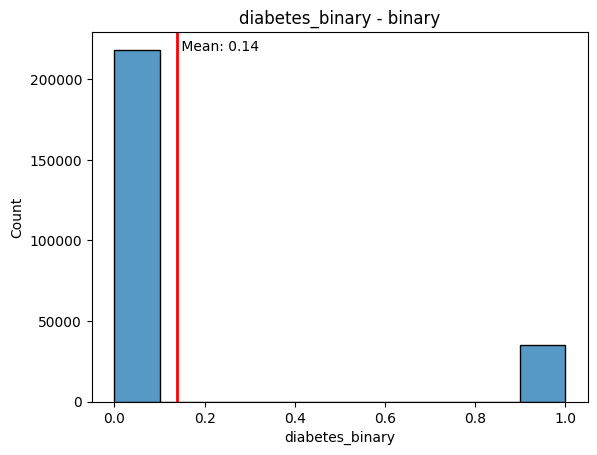

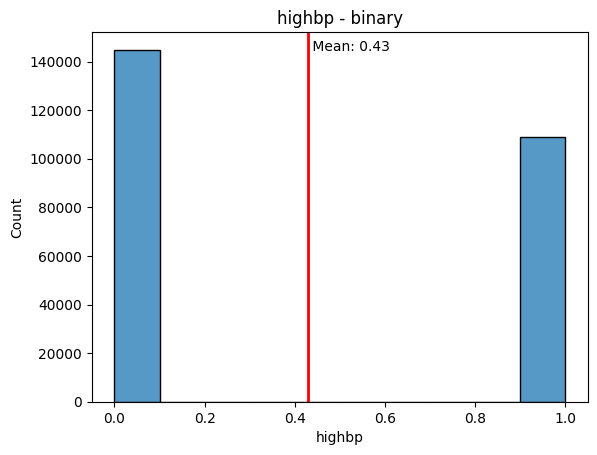

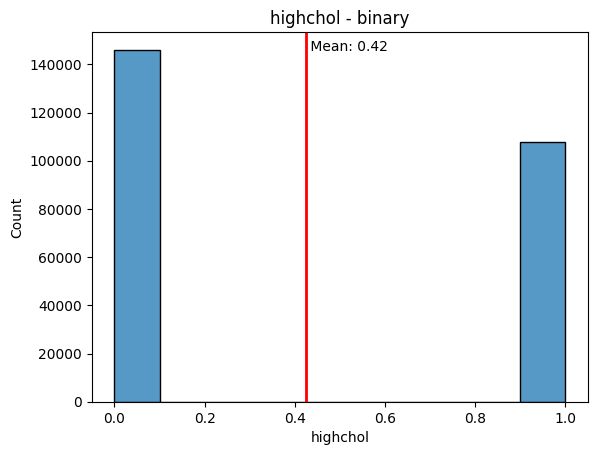

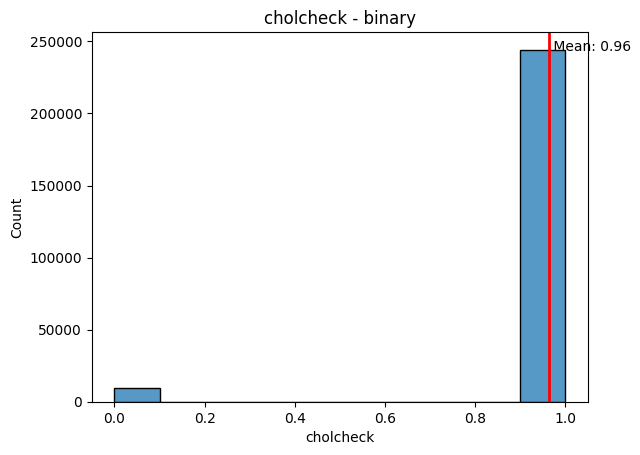

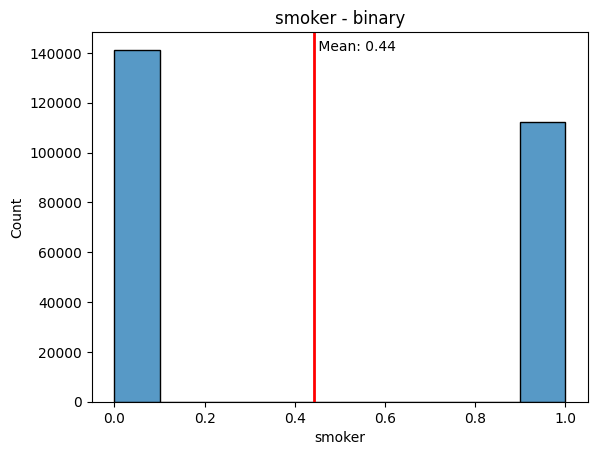

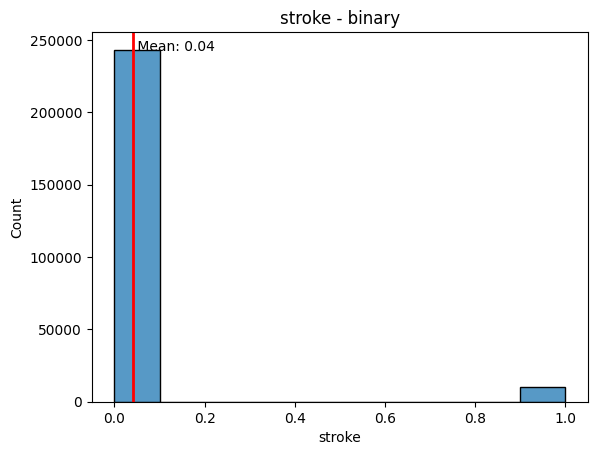

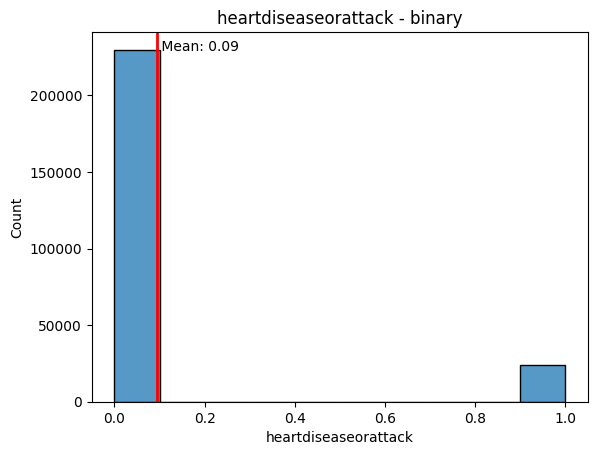

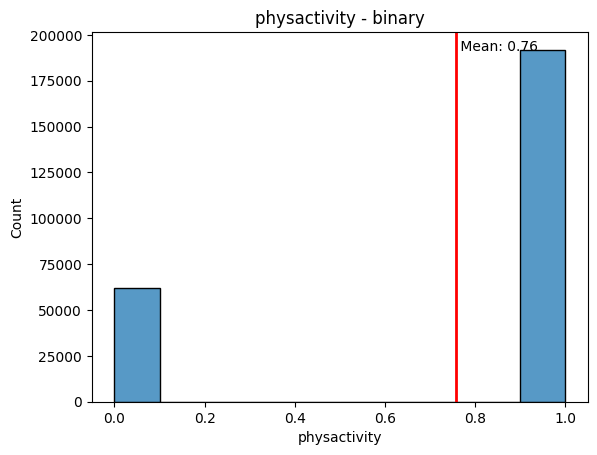

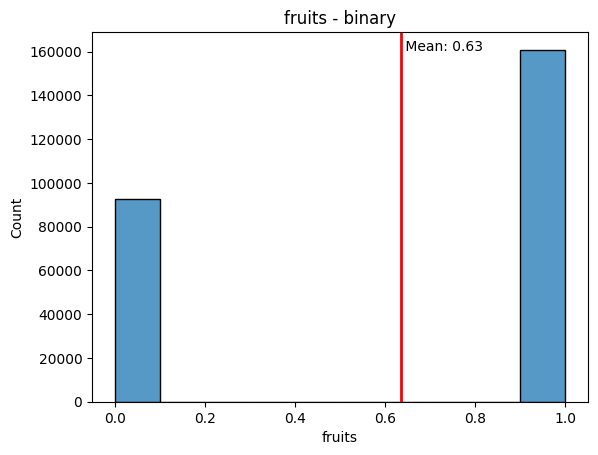

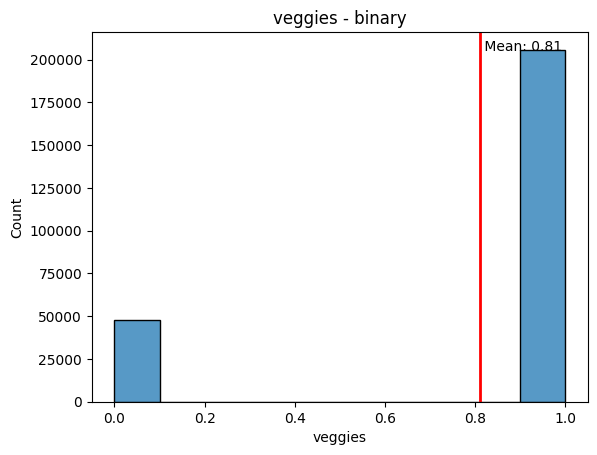

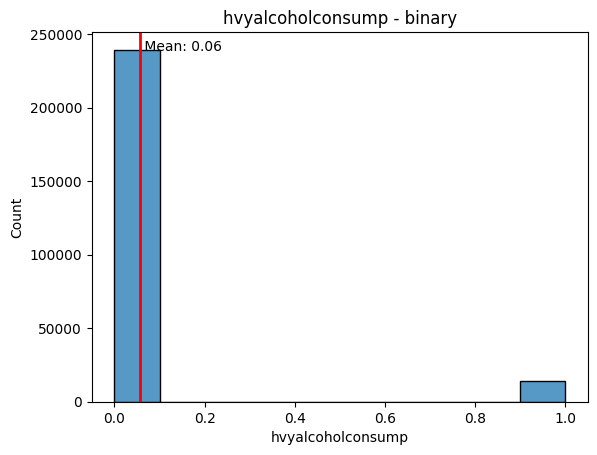

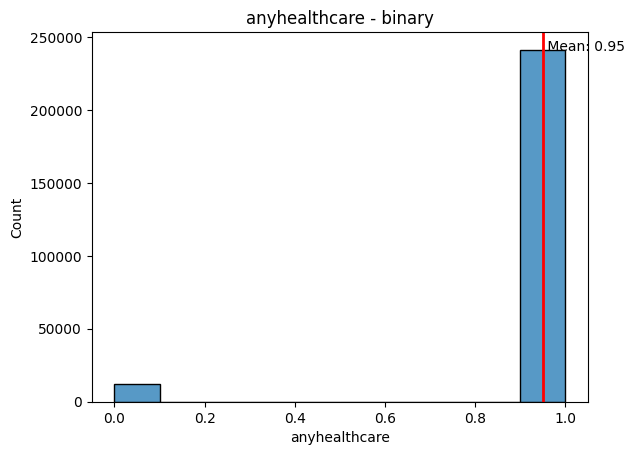

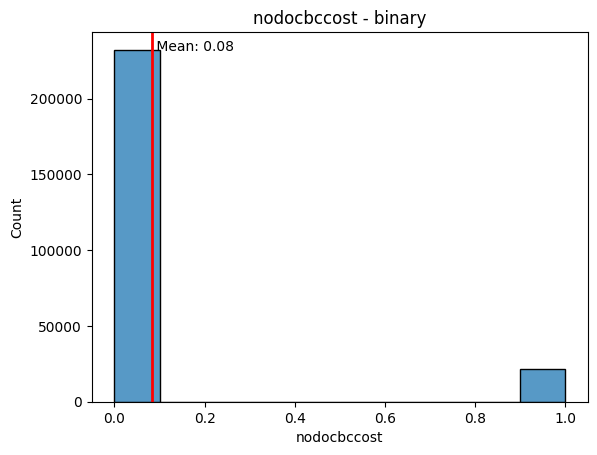

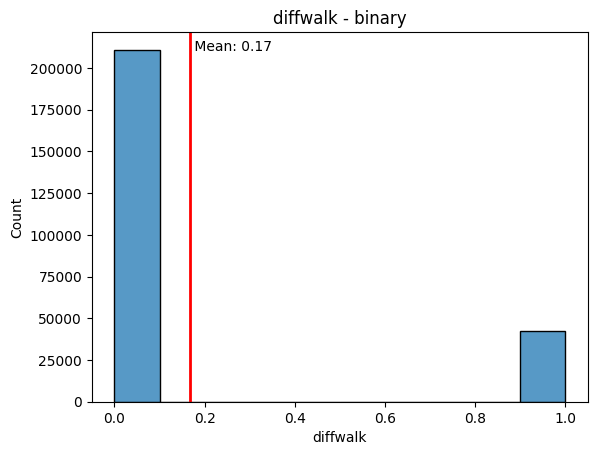

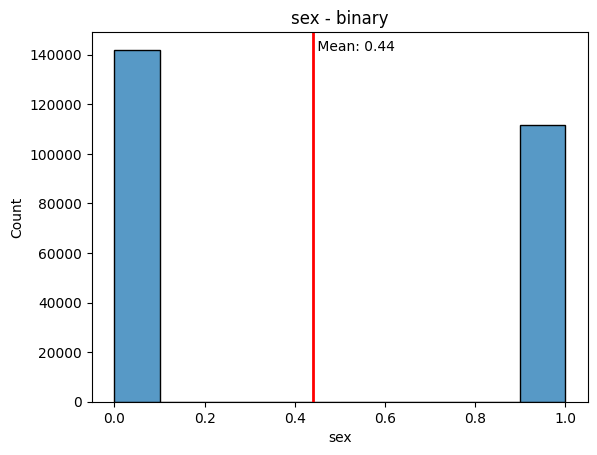

In [28]:
idx = 0
plt.rcParams.update({'figure.max_open_warning': 0})

for col in lstColBin:
    # if we want to plot only the ones with more than x values
    if dfrDia[col].nunique() > 0:
        
        idx = idx + 1
        plt.figure()
        sns.histplot(dfrDia[col] , bins=10 )
        
        mea = dfrDia[col].mean()
        
        plt.axvline( mea , color='red', linewidth=2)
        
        min_ylim, max_ylim = plt.ylim()
        plt.text(mea * 1 , max_ylim *0.95 , ' Mean: {:.2f}'.format(mea))
        
        plt.title( col + ' - binary'  )
        plt.plot()

### NoBinary Columns

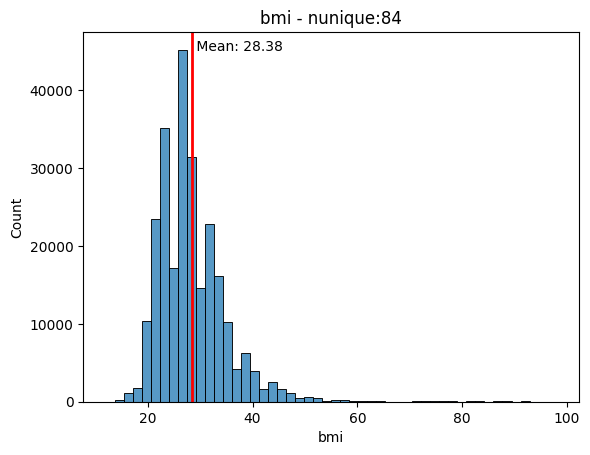

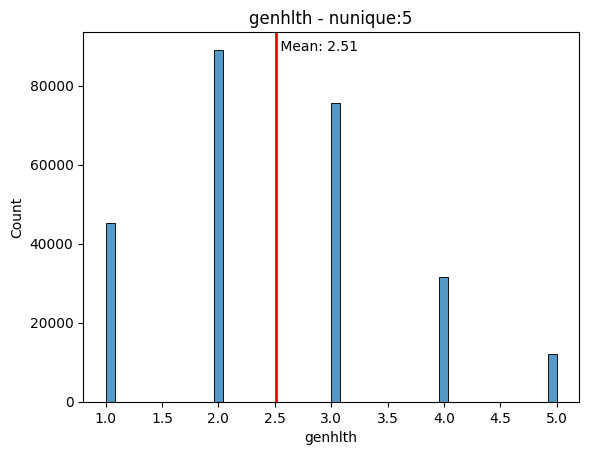

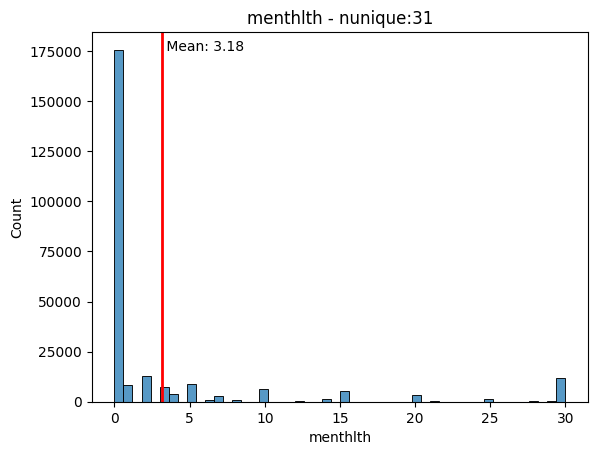

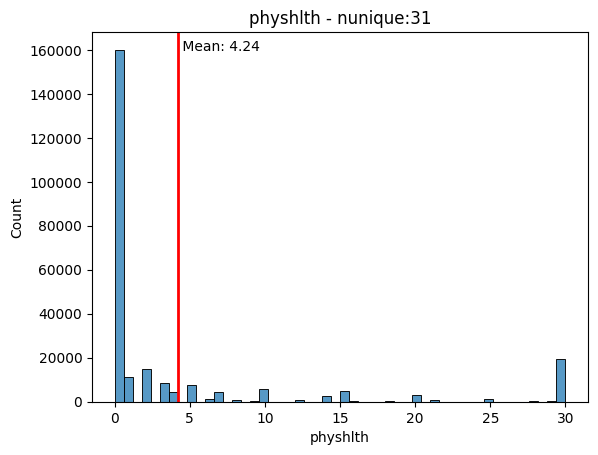

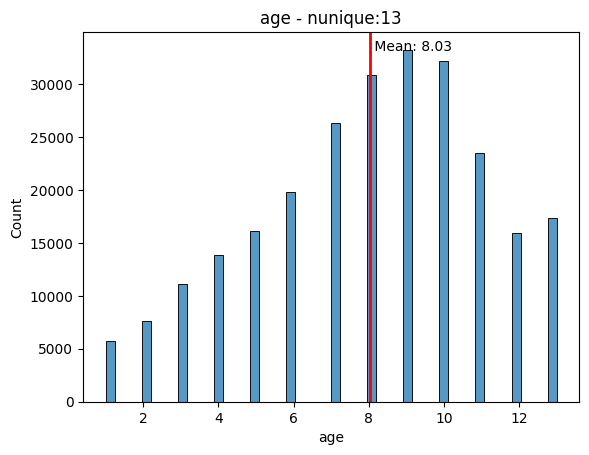

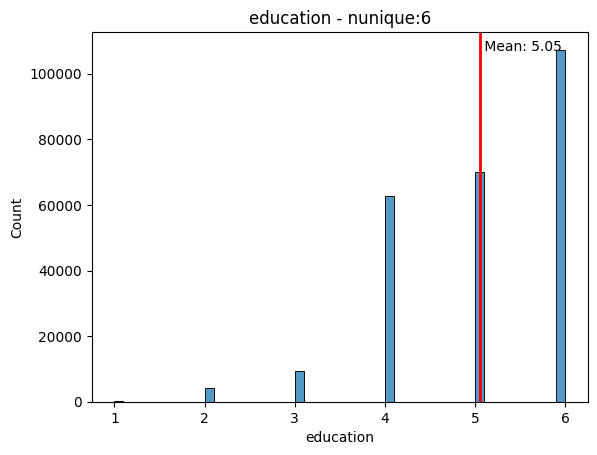

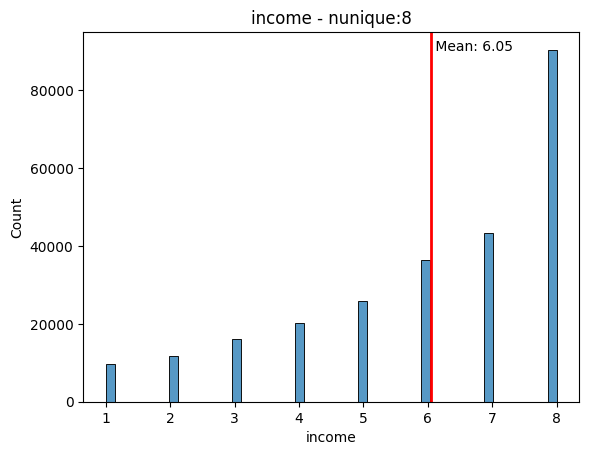

In [29]:
idx = 0
plt.rcParams.update({'figure.max_open_warning': 0})

for col in lstColNoB:
    # if we want to plot only the ones with more than x values
    if dfrDia[col].nunique() > 0:
        
        idx = idx + 1
        plt.figure()
        sns.histplot(dfrDia[col] , bins=50 )
        
        mea = dfrDia[col].mean()
        
        plt.axvline( mea , color='red', linewidth=2)
        
        min_ylim, max_ylim = plt.ylim()
        min_xlim, max_xlim = plt.xlim()
        plt.text(mea * 1 , max_ylim *0.95 , ' Mean: {:.2f}'.format(mea))
        
        plt.title( col + ' - nunique:{}'.format(  dfrDia[col].nunique()  ))
        
        plt.plot()

## Validation Framework

In [30]:
strTar = 'diabetes_binary'

lstFea = lstCol.copy()
lstFea.remove(strTar)

lstFeaBin = lstColBin.copy()
if strTar in lstFeaBin: 
    lstFeaBin.remove(strTar)

lstFeaNoB = lstColNoB.copy()
if strTar in lstFeaNoB: 
    lstFeaNoB.remove(strTar)

print('Target:' , strTar   ,'\n')
print('Features:' , lstFea ,'\n' )
print('Features Binary:' , lstFeaBin   ,'\n' )
print('Features NoBinary:' , lstFeaNoB ,'\n' )

Target: diabetes_binary 

Features: ['highbp', 'highchol', 'cholcheck', 'bmi', 'smoker', 'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies', 'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth', 'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education', 'income'] 

Features Binary: ['highbp', 'highchol', 'cholcheck', 'smoker', 'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies', 'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'diffwalk', 'sex'] 

Features NoBinary: ['bmi', 'genhlth', 'menthlth', 'physhlth', 'age', 'education', 'income'] 



## Split Dataset

In [31]:
# dataframes
dfrTraFul, dfrTst = train_test_split(dfrDia   , test_size=0.20, random_state=1)
dfrTra   , dfrVal = train_test_split(dfrTraFul, test_size=0.25, random_state=1)

dfrDia.shape , dfrTraFul.shape , dfrTra.shape, dfrVal.shape , dfrTst.shape

((253680, 22), (202944, 22), (152208, 22), (50736, 22), (50736, 22))

In [32]:
# Target variables
y_TraFul = dfrTraFul[strTar].values
y_Tra    = dfrTra   [strTar].values
y_Val    = dfrVal   [strTar].values
y_Tst    = dfrTst   [strTar].values
len(dfrDia) , len(y_TraFul) , len(y_Tra) , len(y_Val) , len(y_Tst)

(253680, 202944, 152208, 50736, 50736)

In [33]:
# Keep the Target in TraFul (for final training) but remove form others !

dfrTraFul.reset_index(drop=True, inplace=True) 

for dfr in [ dfrTra, dfrVal , dfrTst ]:
    dfr.reset_index(drop=True , inplace=True)
    dfr.drop(columns=[strTar] , axis=1 , inplace=True)

dfrDia.shape , dfrTraFul.shape , dfrTra.shape, dfrVal.shape , dfrTst.shape

((253680, 22), (202944, 22), (152208, 21), (50736, 21), (50736, 21))

## Feature importance (on risk of diabete)

In [34]:
dia_risk = y_TraFul.mean()
dia_risk.round(5)

0.13935

### Binary Features

In [35]:
# store the difference of Risk in a dataFrame to sort later
dfrRsk = pda.DataFrame(columns=['RskDif'])

# evaluate each BINARY feature regarding the diabete risk
for col in lstFeaBin:
    #print(col)
    df_group = dfrTraFul.groupby(col)[strTar].agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - dia_risk
    df_group['risk'] = df_group['mean'] / dia_risk
    display(df_group)
    #floRskDif = df_group['risk'][1] - df_group['risk'][0]
    floRskDif = df_group['risk'].iloc[-1] - df_group['risk'].iloc[0]
    print(col , 'difference in dead_risk : ' , floRskDif.round(3) )
    dfrRsk.loc[col] = [floRskDif]
    print('_'*50)

,mean,count,diff,risk
highbp,,,,
0,0.059998,115837,-0.079356,0.430545
1,0.244883,87107,0.105529,1.757275


highbp difference in dead_risk :  1.327
__________________________________________________


,mean,count,diff,risk
highchol,,,,
0,0.079315,116901,-0.060039,0.569163
1,0.220924,86043,0.081571,1.585350


highchol difference in dead_risk :  1.016
__________________________________________________


,mean,count,diff,risk
cholcheck,,,,
0,0.025788,7678,-0.113566,0.185054
1,0.143819,195266,0.004465,1.032044


cholcheck difference in dead_risk :  0.847
__________________________________________________


,mean,count,diff,risk
smoker,,,,
0,0.120898,112880,-0.018455,0.867564
1,0.162484,90064,0.023131,1.165986


smoker difference in dead_risk :  0.298
__________________________________________________


,mean,count,diff,risk
stroke,,,,
0,0.131783,194722,-0.007571,0.945671
1,0.318657,8222,0.179304,2.286679


stroke difference in dead_risk :  1.341
__________________________________________________


,mean,count,diff,risk
heartdiseaseorattack,,,,
0,0.119527,183783,-0.019827,0.857723
1,0.329524,19161,0.190170,2.364655


heartdiseaseorattack difference in dead_risk :  1.507
__________________________________________________


,mean,count,diff,risk
physactivity,,,,
0,0.210988,49401,0.071634,1.514044
1,0.116306,153543,-0.023048,0.834611


physactivity difference in dead_risk :  -0.679
__________________________________________________


,mean,count,diff,risk
fruits,,,,
0,0.158001,74202,0.018647,1.133814
1,0.128606,128742,-0.010748,0.922875


fruits difference in dead_risk :  -0.211
__________________________________________________


,mean,count,diff,risk
veggies,,,,
0,0.179723,38231,0.04037,1.289691
1,0.129984,164713,-0.00937,0.932761


veggies difference in dead_risk :  -0.357
__________________________________________________


,mean,count,diff,risk
hvyalcoholconsump,,,,
0,0.144167,191486,0.004813,1.034541
1,0.058911,11458,-0.080443,0.422743


hvyalcoholconsump difference in dead_risk :  -0.612
__________________________________________________


,mean,count,diff,risk
anyhealthcare,,,,
0,0.116546,9936,-0.022808,0.836331
1,0.140528,193008,0.001174,1.008426


anyhealthcare difference in dead_risk :  0.172
__________________________________________________


,mean,count,diff,risk
nodocbccost,,,,
0,0.136066,185822,-0.003288,0.976405
1,0.175038,17122,0.035684,1.256070


nodocbccost difference in dead_risk :  0.28
__________________________________________________


,mean,count,diff,risk
diffwalk,,,,
0,0.105517,168817,-0.033837,0.757186
1,0.306737,34127,0.167383,2.201137


diffwalk difference in dead_risk :  1.444
__________________________________________________


,mean,count,diff,risk
sex,,,,
0,0.129762,113546,-0.009591,0.931173
1,0.151536,89398,0.012182,1.087419


sex difference in dead_risk :  0.156
__________________________________________________


In [36]:
dfrRsk.sort_values(by='RskDif' , ascending=False)

,RskDif
heartdiseaseorattack,1.506933
diffwalk,1.443951
stroke,1.341009
highbp,1.326729
highchol,1.016187
cholcheck,0.846990
smoker,0.298422
nodocbccost,0.279664
anyhealthcare,0.172094
sex,0.156246


<div class="alert alert-block alert-success">
<p>Binary Features <b>increasing</b> most the risk of diabetes: 
<ul>
<li>heartdiseaseorattack	1.506933
<li>diffwalk	1.443951
<li>stroke	1.341009
<li>highbp	1.326729
<li>highchol	1.016187
</ul>
    
<p>Binary Features <b>decreasing</b> most the risk of diabetes: 
<ul>
<li>physactivity	-0.679433
<li>hvyalcoholconsump	-0.611799
</ul>
    
</div>

### NoBinary (plot + trendline)

,mean,count,diff,risk
bmi,,,,
12,0.000000,6,-0.139354,0.000000
13,0.000000,14,-0.139354,0.000000
14,0.062500,32,-0.076854,0.448499
15,0.076190,105,-0.063163,0.546742
16,0.058182,275,-0.081172,0.417512
...,...,...,...,...
91,0.000000,1,-0.139354,0.000000
92,0.142857,28,0.003503,1.025141
95,0.111111,9,-0.028243,0.797332


Trend (polyfit) =  [0.01492682 1.03052129]
__________________________________________________


,mean,count,diff,risk
genhlth,,,,
1,0.025408,36249,-0.113946,0.182325
2,0.070919,71363,-0.068435,0.508914
3,0.178398,60421,0.039045,1.280183
4,0.310283,25235,0.170930,2.226588
5,0.381356,9676,0.242002,2.736604


Trend (polyfit) =  [ 0.68262329 -0.66094707]
__________________________________________________


,mean,count,diff,risk
menthlth,,,,
0,0.133176,140618,-0.006177,0.955672
1,0.093092,6789,-0.046262,0.668025
2,0.117134,10441,-0.022219,0.840554
3,0.122780,5913,-0.016573,0.881070
4,0.129381,3053,-0.009973,0.928436
5,0.133166,7179,-0.006188,0.955598
6,0.162437,788,0.023083,1.165642
7,0.130366,2516,-0.008988,0.935502
8,0.163424,514,0.024070,1.172729


Trend (polyfit) =  [0.02227388 0.88955174]
__________________________________________________


,mean,count,diff,risk
physhlth,,,,
0,0.104414,127971,-0.034939,0.749275
1,0.104317,9174,-0.035037,0.748574
2,0.137498,11782,-0.001856,0.986683
3,0.149114,6827,0.009760,1.070038
4,0.164781,3623,0.025427,1.182463
5,0.171570,6050,0.032217,1.231185
6,0.213953,1075,0.074600,1.535327
7,0.166989,3623,0.027635,1.198308
8,0.204301,651,0.064947,1.466061


Trend (polyfit) =  [0.04052341 1.02426868]
__________________________________________________


,mean,count,diff,risk
age,,,,
1,0.013637,4473,-0.125716,0.097862
2,0.018346,6105,-0.121008,0.131648
3,0.027818,8915,-0.111535,0.199624
4,0.046334,11007,-0.093020,0.332493
5,0.065460,12817,-0.073894,0.469739
6,0.088795,15823,-0.050559,0.637190
7,0.118246,21100,-0.021107,0.848535
8,0.137857,24685,-0.001497,0.989260
9,0.169930,26611,0.030576,1.219413


Trend (polyfit) =  [ 0.13742464 -0.13086304]
__________________________________________________


,mean,count,diff,risk
education,,,,
1,0.295455,132,0.156101,2.120177
2,0.285011,3249,0.145657,2.045233
3,0.244197,7539,0.104843,1.752353
4,0.176823,50299,0.037469,1.268876
5,0.148913,55959,0.009559,1.068594
6,0.096169,85766,-0.043185,0.690105


Trend (polyfit) =  [-0.30182153  2.54726494]
__________________________________________________


,mean,count,diff,risk
income,,,,
1,0.244741,7796,0.105387,1.756257
2,0.262034,9411,0.122680,1.880350
3,0.224716,12745,0.085362,1.612555
4,0.200136,16144,0.060783,1.436175
5,0.172992,20631,0.033638,1.241389
6,0.145640,29257,0.006287,1.045113
7,0.121509,34623,-0.017845,0.871945
8,0.079835,72337,-0.059519,0.572892


Trend (polyfit) =  [-0.18122249  2.1175857 ]
__________________________________________________


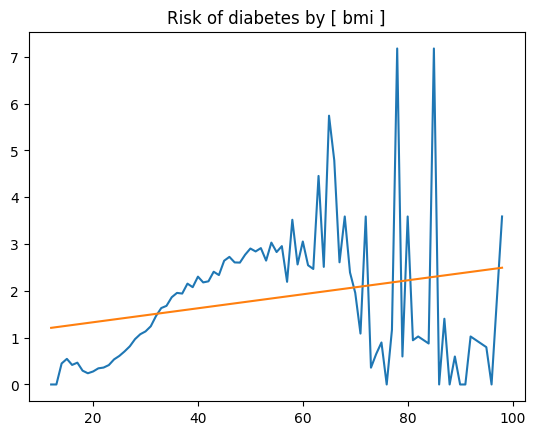

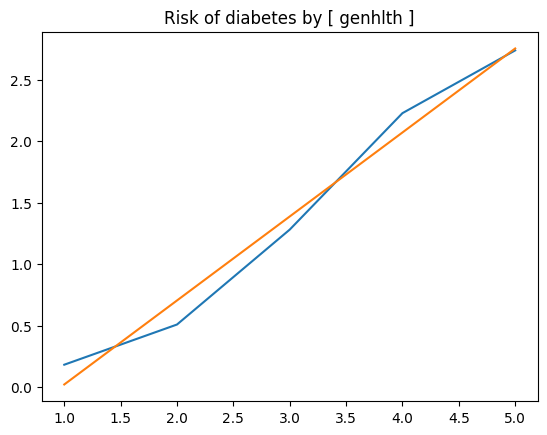

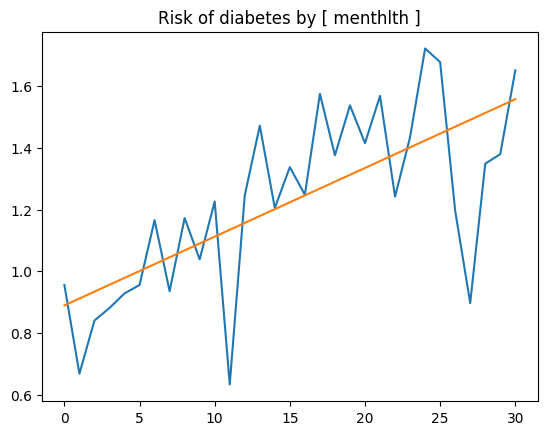

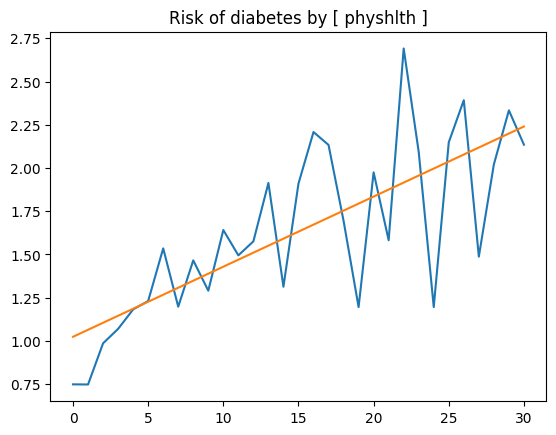

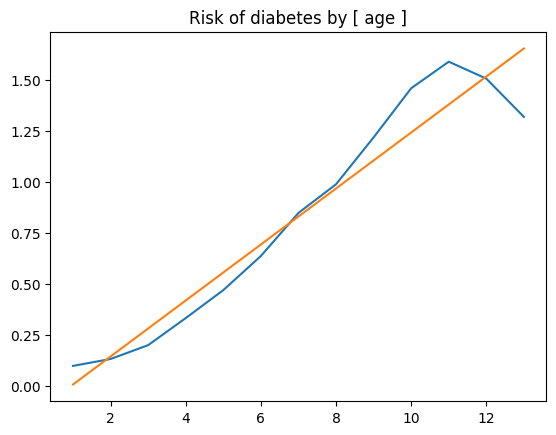

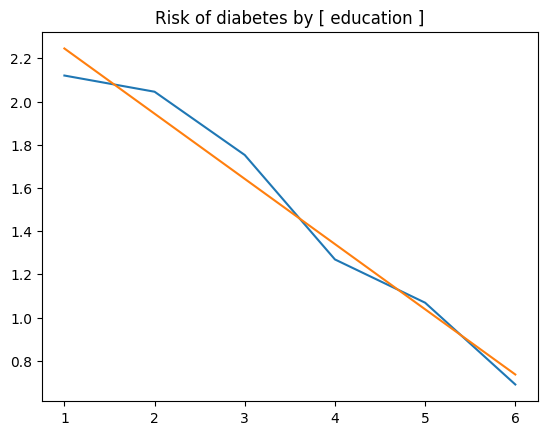

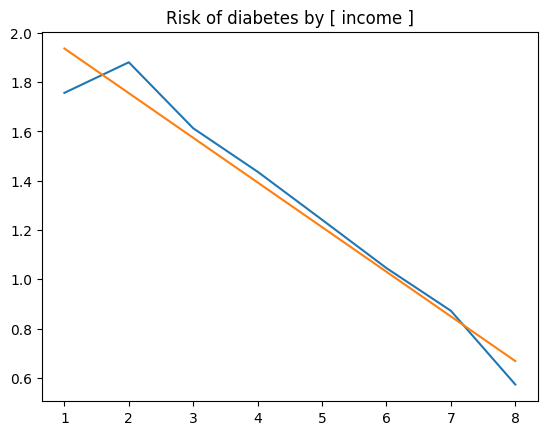

In [37]:
# store the difference of Risk in a dataFrame to sort later
dfrRsk = pda.DataFrame(columns=['RskDif'])

# evaluate each NO BINARY feature regarding the diabete risk
for col in lstFeaNoB:
    #print(col)
    df_group = dfrTraFul.groupby(col)[strTar].agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - dia_risk
    df_group['risk'] = df_group['mean'] / dia_risk
    display(df_group)
    #floRskDif = df_group['risk'][1] - df_group['risk'][0]
    #floRskDif = df_group['risk'].iloc[-1] - df_group['risk'].iloc[0]
    #print(col , 'difference in dead_risk : ' , floRskDif.round(3) )
    #dfrRsk.loc[col] = [floRskDif]
    
    plt.figure()
    plt.plot(df_group['risk'])
    plt.title('Risk of diabetes by [ ' + col + ' ]')
    
    # Calculate the Trendline
    z = npy.polyfit(df_group['risk'].index.tolist(), df_group['risk'].tolist(), 1)
    print('Trend (polyfit) = ' , z)
    p = npy.poly1d(z)

    # Display the Trendline
    plt.plot(df_group['risk'].index.tolist(), p(df_group['risk'].index.tolist()))
    
    print('_'*50)

<div class="alert alert-block alert-success">
<p>All NoBinary Features have a high influence on the Risk of diabete <b>except [bmi]</b>] !  
</div>

## Categorical Features importance (Mutual information)

In [38]:
# store the difference of Risk in a dataFrame to sort later
dfrMui = pda.DataFrame(columns=['MutInf'])

# evaluate each CAT column regarding the diabete risk
for col in tqdm(lstFea):
    #print(col)
    floMutInf = mutual_info_score(dfrTraFul[strTar], dfrTraFul[col] ) * 100
    dfrMui.loc[col] = [floMutInf]
    print(col , ' - Mutual information vs diabete_risk : ' , floMutInf.round(6) )
    
dfrMui.sort_values(by='MutInf' , ascending=False)

  0%|          | 0/21 [00:00<?, ?it/s]

highbp  - Mutual information vs diabete_risk :  3.532167
highchol  - Mutual information vs diabete_risk :  2.028542
cholcheck  - Mutual information vs diabete_risk :  0.300159
bmi  - Mutual information vs diabete_risk :  2.76674
smoker  - Mutual information vs diabete_risk :  0.176874
stroke  - Mutual information vs diabete_risk :  0.446198
heartdiseaseorattack  - Mutual information vs diabete_risk :  1.251736
physactivity  - Mutual information vs diabete_risk :  0.637251
fruits  - Mutual information vs diabete_risk :  0.082383
veggies  - Mutual information vs diabete_risk :  0.149239
hvyalcoholconsump  - Mutual information vs diabete_risk :  0.197424
anyhealthcare  - Mutual information vs diabete_risk :  0.011694
nodocbccost  - Mutual information vs diabete_risk :  0.046106
genhlth  - Mutual information vs diabete_risk :  4.429639
menthlth  - Mutual information vs diabete_risk :  0.271704
physhlth  - Mutual information vs diabete_risk :  1.407159
diffwalk  - Mutual information vs diab

,MutInf
genhlth,4.429639
highbp,3.532167
bmi,2.766740
highchol,2.028542
age,2.010356
diffwalk,1.976238
physhlth,1.407159
income,1.346522
heartdiseaseorattack,1.251736
education,0.772067


## Correlation of features: v or log1p(v) ?

In [40]:
dfrTraFul[lstFea].corrwith(dfrTraFul[strTar]).abs().sort_values(ascending=False)

genhlth                 0.294812
highbp                  0.264243
bmi                     0.218196
diffwalk                0.217310
highchol                0.202074
heartdiseaseorattack    0.177307
age                     0.176377
physhlth                0.173303
income                  0.164192
education               0.125205
physactivity            0.117328
stroke                  0.106389
menthlth                0.070515
cholcheck               0.065026
smoker                  0.059660
hvyalcoholconsump       0.056820
veggies                 0.056160
fruits                  0.040878
nodocbccost             0.031278
sex                     0.031213
anyhealthcare           0.014943
dtype: float64

In [41]:
npy.log1p(dfrTraFul[lstFea]).corrwith(dfrTraFul[strTar]).abs().sort_values(ascending=False)

genhlth                 0.281883
highbp                  0.264243
bmi                     0.226844
diffwalk                0.217310
highchol                0.202074
heartdiseaseorattack    0.177307
physhlth                0.174239
age                     0.172769
income                  0.156291
education               0.124544
physactivity            0.117328
stroke                  0.106389
cholcheck               0.065026
smoker                  0.059660
menthlth                0.057420
hvyalcoholconsump       0.056820
veggies                 0.056160
fruits                  0.040878
nodocbccost             0.031278
sex                     0.031213
anyhealthcare           0.014943
dtype: float64

<div class="alert alert-block alert-success">
<p> log1p(v) does <b>not</b> improve significatly the correlation with diabetes risk.
</div>

## ROC AUC of all Features

In [42]:
# Dataframe to save result index=column name
dfrAuc = pda.DataFrame(columns=[ 'Auc' , 'Inv'])

for fea in lstFea:
    strInv = ''
    floAuc = roc_auc_score(y_TraFul, dfrTraFul[fea])
    print( fea ,' - floAuc=' , floAuc)
    
    if floAuc < 0.5:
        # mark that th ROC has been inversed
        strInv = 'Y'   
        # inverse it
        floAuc = roc_auc_score(y_TraFul, -dfrTraFul[fea])
        print('         ! <0.5 => -floAuc=' , floAuc)
    
    dfrAuc.loc[fea] = [ floAuc , strInv ]
    
dfrAuc.sort_values(by='Auc' , ascending=False)

highbp  - floAuc= 0.6888319565709426
highchol  - floAuc= 0.6441784393397444
cholcheck  - floAuc= 0.517912079812359
bmi  - floAuc= 0.6887477911990052
smoker  - floAuc= 0.5427948336020096
stroke  - floAuc= 0.5302842552669526
heartdiseaseorattack  - floAuc= 0.5748531806785037
physactivity  - floAuc= 0.4273049245100675
         ! <0.5 => -floAuc= 0.5726950754899325
fruits  - floAuc= 0.47157602078458805
         ! <0.5 => -floAuc= 0.528423979215412
veggies  - floAuc= 0.46829555998497985
         ! <0.5 => -floAuc= 0.5317044400150203
hvyalcoholconsump  - floAuc= 0.48106579274479394
         ! <0.5 => -floAuc= 0.5189342072552061
anyhealthcare  - floAuc= 0.504655280945236
nodocbccost  - floAuc= 0.5125510946126924
genhlth  - floAuc= 0.7312102867014877
menthlth  - floAuc= 0.5276068626879022
physhlth  - floAuc= 0.6138333799983331
diffwalk  - floAuc= 0.6173436824485458
sex  - floAuc= 0.5223718061911633
age  - floAuc= 0.6464907357925606
education  - floAuc= 0.4047178140510738
         ! <0.5 => -fl

,Auc,Inv
genhlth,0.731210,
highbp,0.688832,
bmi,0.688748,
age,0.646491,
highchol,0.644178,
income,0.632262,Y
diffwalk,0.617344,
physhlth,0.613833,
education,0.595282,Y
heartdiseaseorattack,0.574853,
